In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [8]:
dataset = pd.read_csv("Space_Missions.csv")

In [731]:
dataset.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Decade
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,0.0,Success,1950
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,0.0,Success,1950
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,0.0,Failure,1950
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,0.0,Success,1950
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,0.0,Failure,1950


In [ ]:
# Cleaning

In [729]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4630 non-null   category      
 1   Location       4630 non-null   category      
 2   Date           4630 non-null   datetime64[ns]
 3   Time           4503 non-null   object        
 4   Rocket         4630 non-null   category      
 5   Mission        4630 non-null   object        
 6   RocketStatus   4630 non-null   category      
 7   Price          4630 non-null   float64       
 8   MissionStatus  4630 non-null   category      
 9   Decade         4630 non-null   int32         
dtypes: category(5), datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 213.7+ KB


In [11]:
dataset = dataset.astype({
    "Company":"category",
    "Location":"category",
    "Rocket":"category",
    "MissionStatus":"category",
    "RocketStatus":"category"
})

In [13]:
dataset["Price"] = dataset["Price"].str.replace(",","")

In [21]:
dataset["Price"] = dataset["Price"].fillna(0)

In [23]:
dataset["Price"] = pd.to_numeric(dataset["Price"])

In [25]:
dataset["Date"] = pd.to_datetime(dataset["Date"],format = "%d-%m-%Y")

In [27]:
dataset["Time"] = pd.to_datetime(dataset["Time"],format = "%H:%M:%S")

In [ ]:
# Analyze the trend of total missions launched per year and visualize it using a line plot.

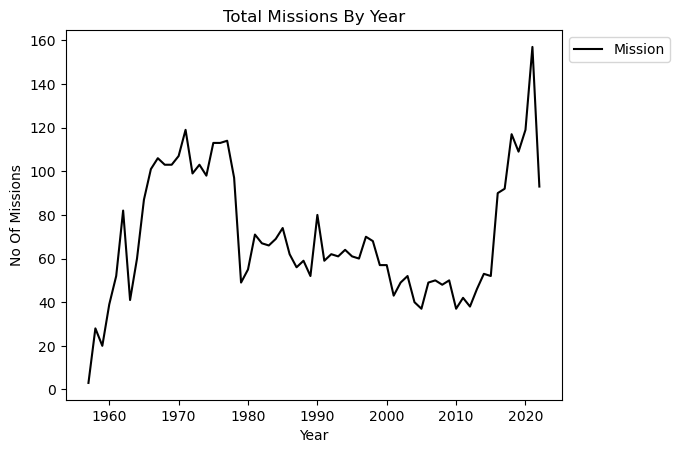

In [17]:
dataset.groupby(dataset["Date"].dt.year)[["Mission"]].count().plot(
    title = "Total Missions By Year",
    xlabel = "Year",
    ylabel = "No Of Missions",
    color="black"
).legend(bbox_to_anchor=(1,1));

In [19]:
mission_year = dataset.groupby(dataset["Date"].dt.year)[["Mission"]].count().reset_index()

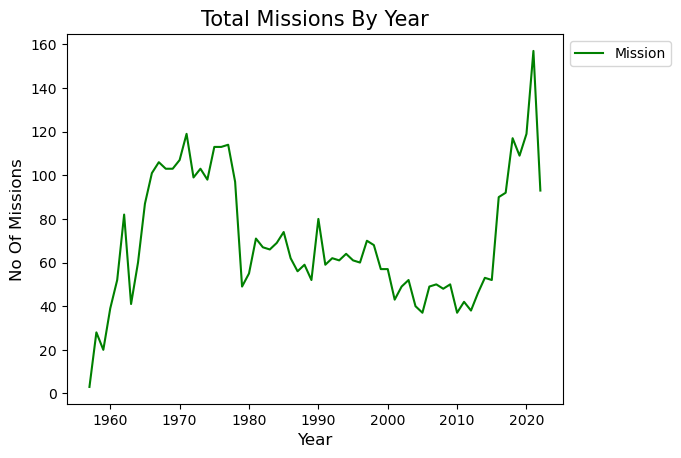

In [21]:
sns.lineplot(x="Date",y="Mission",data= mission_year,color="g",label="Mission")
plt.title("Total Missions By Year",fontsize=15)
plt.xlabel("Year",fontsize=12)
plt.ylabel("No Of Missions",fontsize=12)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
# Plot the distribution of mission statuses (success, failure,etc) as a bar chart.

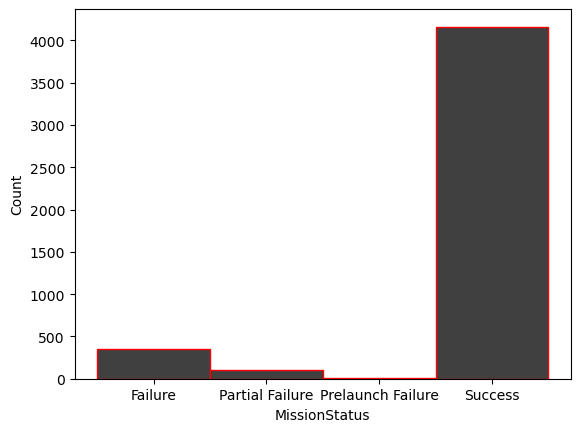

In [33]:
sns.histplot(x="MissionStatus",data=dataset,color="black",edgecolor="red",linewidth=1)
plt.show()

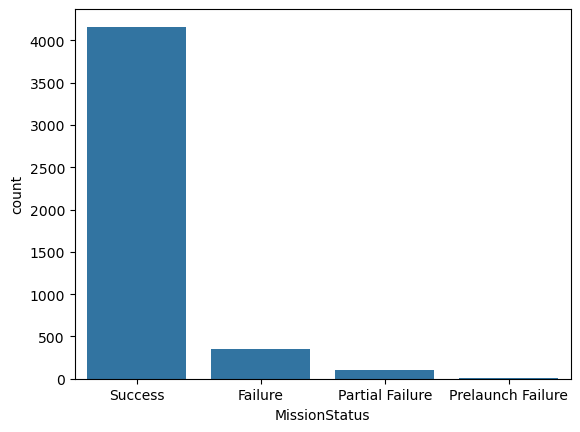

In [25]:
sns.countplot(x=dataset["MissionStatus"],order=["Success","Failure","Partial Failure","Prelaunch Failure"])
plt.show()

In [27]:
status = dataset.groupby("MissionStatus",observed=False)[["MissionStatus"]].count()

In [274]:
status

,MissionStatus
MissionStatus,
Failure,357
Partial Failure,107
Prelaunch Failure,4
Success,4162


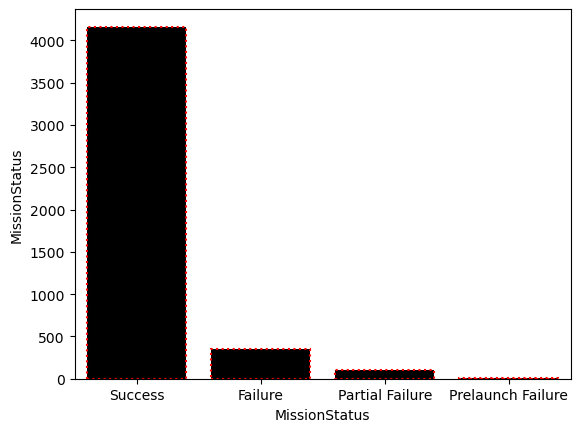

In [29]:
sns.barplot(x=status.index,y=status["MissionStatus"],order = ["Success","Failure","Partial Failure","Prelaunch Failure"],
           color = "black", align = "edge", edgecolor = 'r', linestyle = ':', linewidth = 1.5)
plt.show()

In [ ]:
# Analyze and visualize the number of missions launched by each company.

In [49]:
Company_wise_missions = dataset.groupby("Company",observed=False)[["Mission"]].count().reset_index()

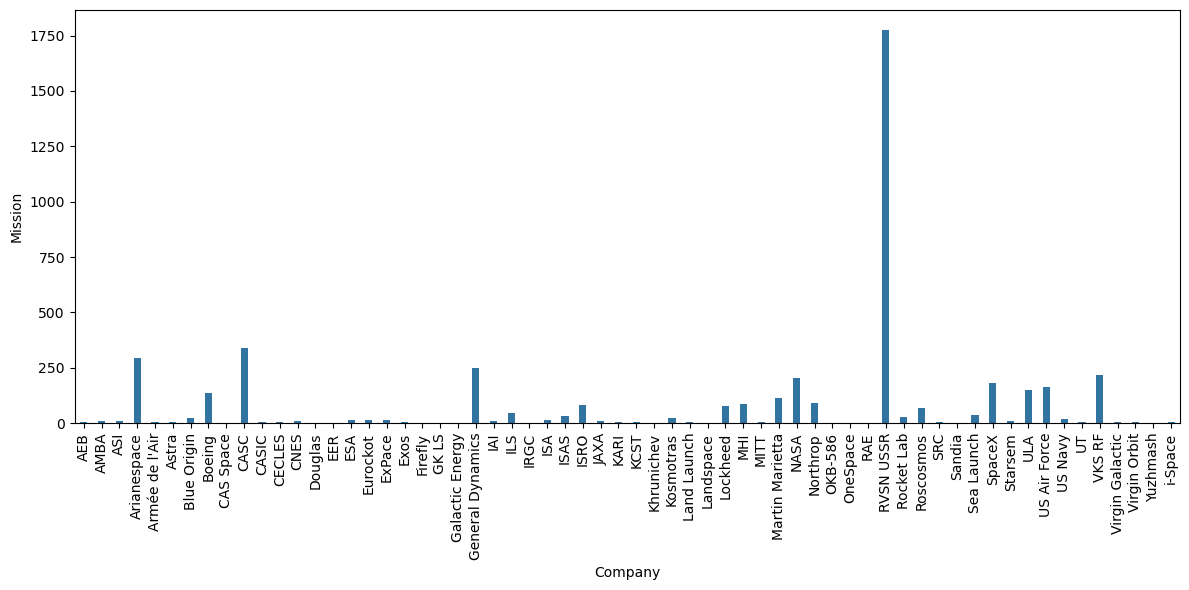

In [99]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Company",y="Mission",data=Company_wise_missions,width=0.4)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Create a histogram of the cost of missions (where available) to show the distribution.

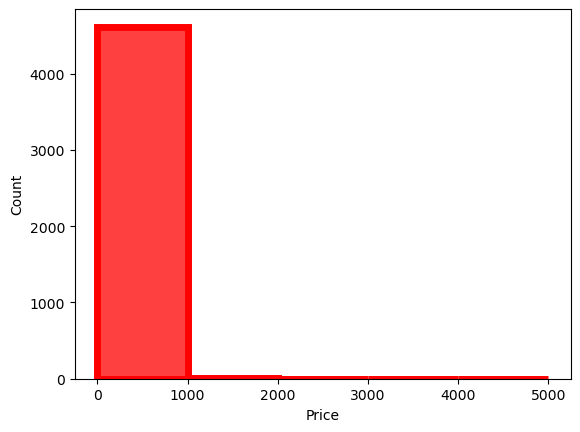

In [133]:
sns.histplot(x=dataset["Price"],bins=[0,1000,2000,3000,4000,5000],color="r",edgecolor="r",linewidth=5)
plt.show()

In [ ]:
# Visualize the number of missions launched from each location using a horizontal bar chart.

In [151]:
Location_wise_missions = dataset.groupby("Location",observed=False)[["Mission"]].count().reset_index()

C:\Users\soumy\AppData\Local\Temp\ipykernel_15356\3857463528.py:4: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  plt.tight_layout()
E:\J_Notebook\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


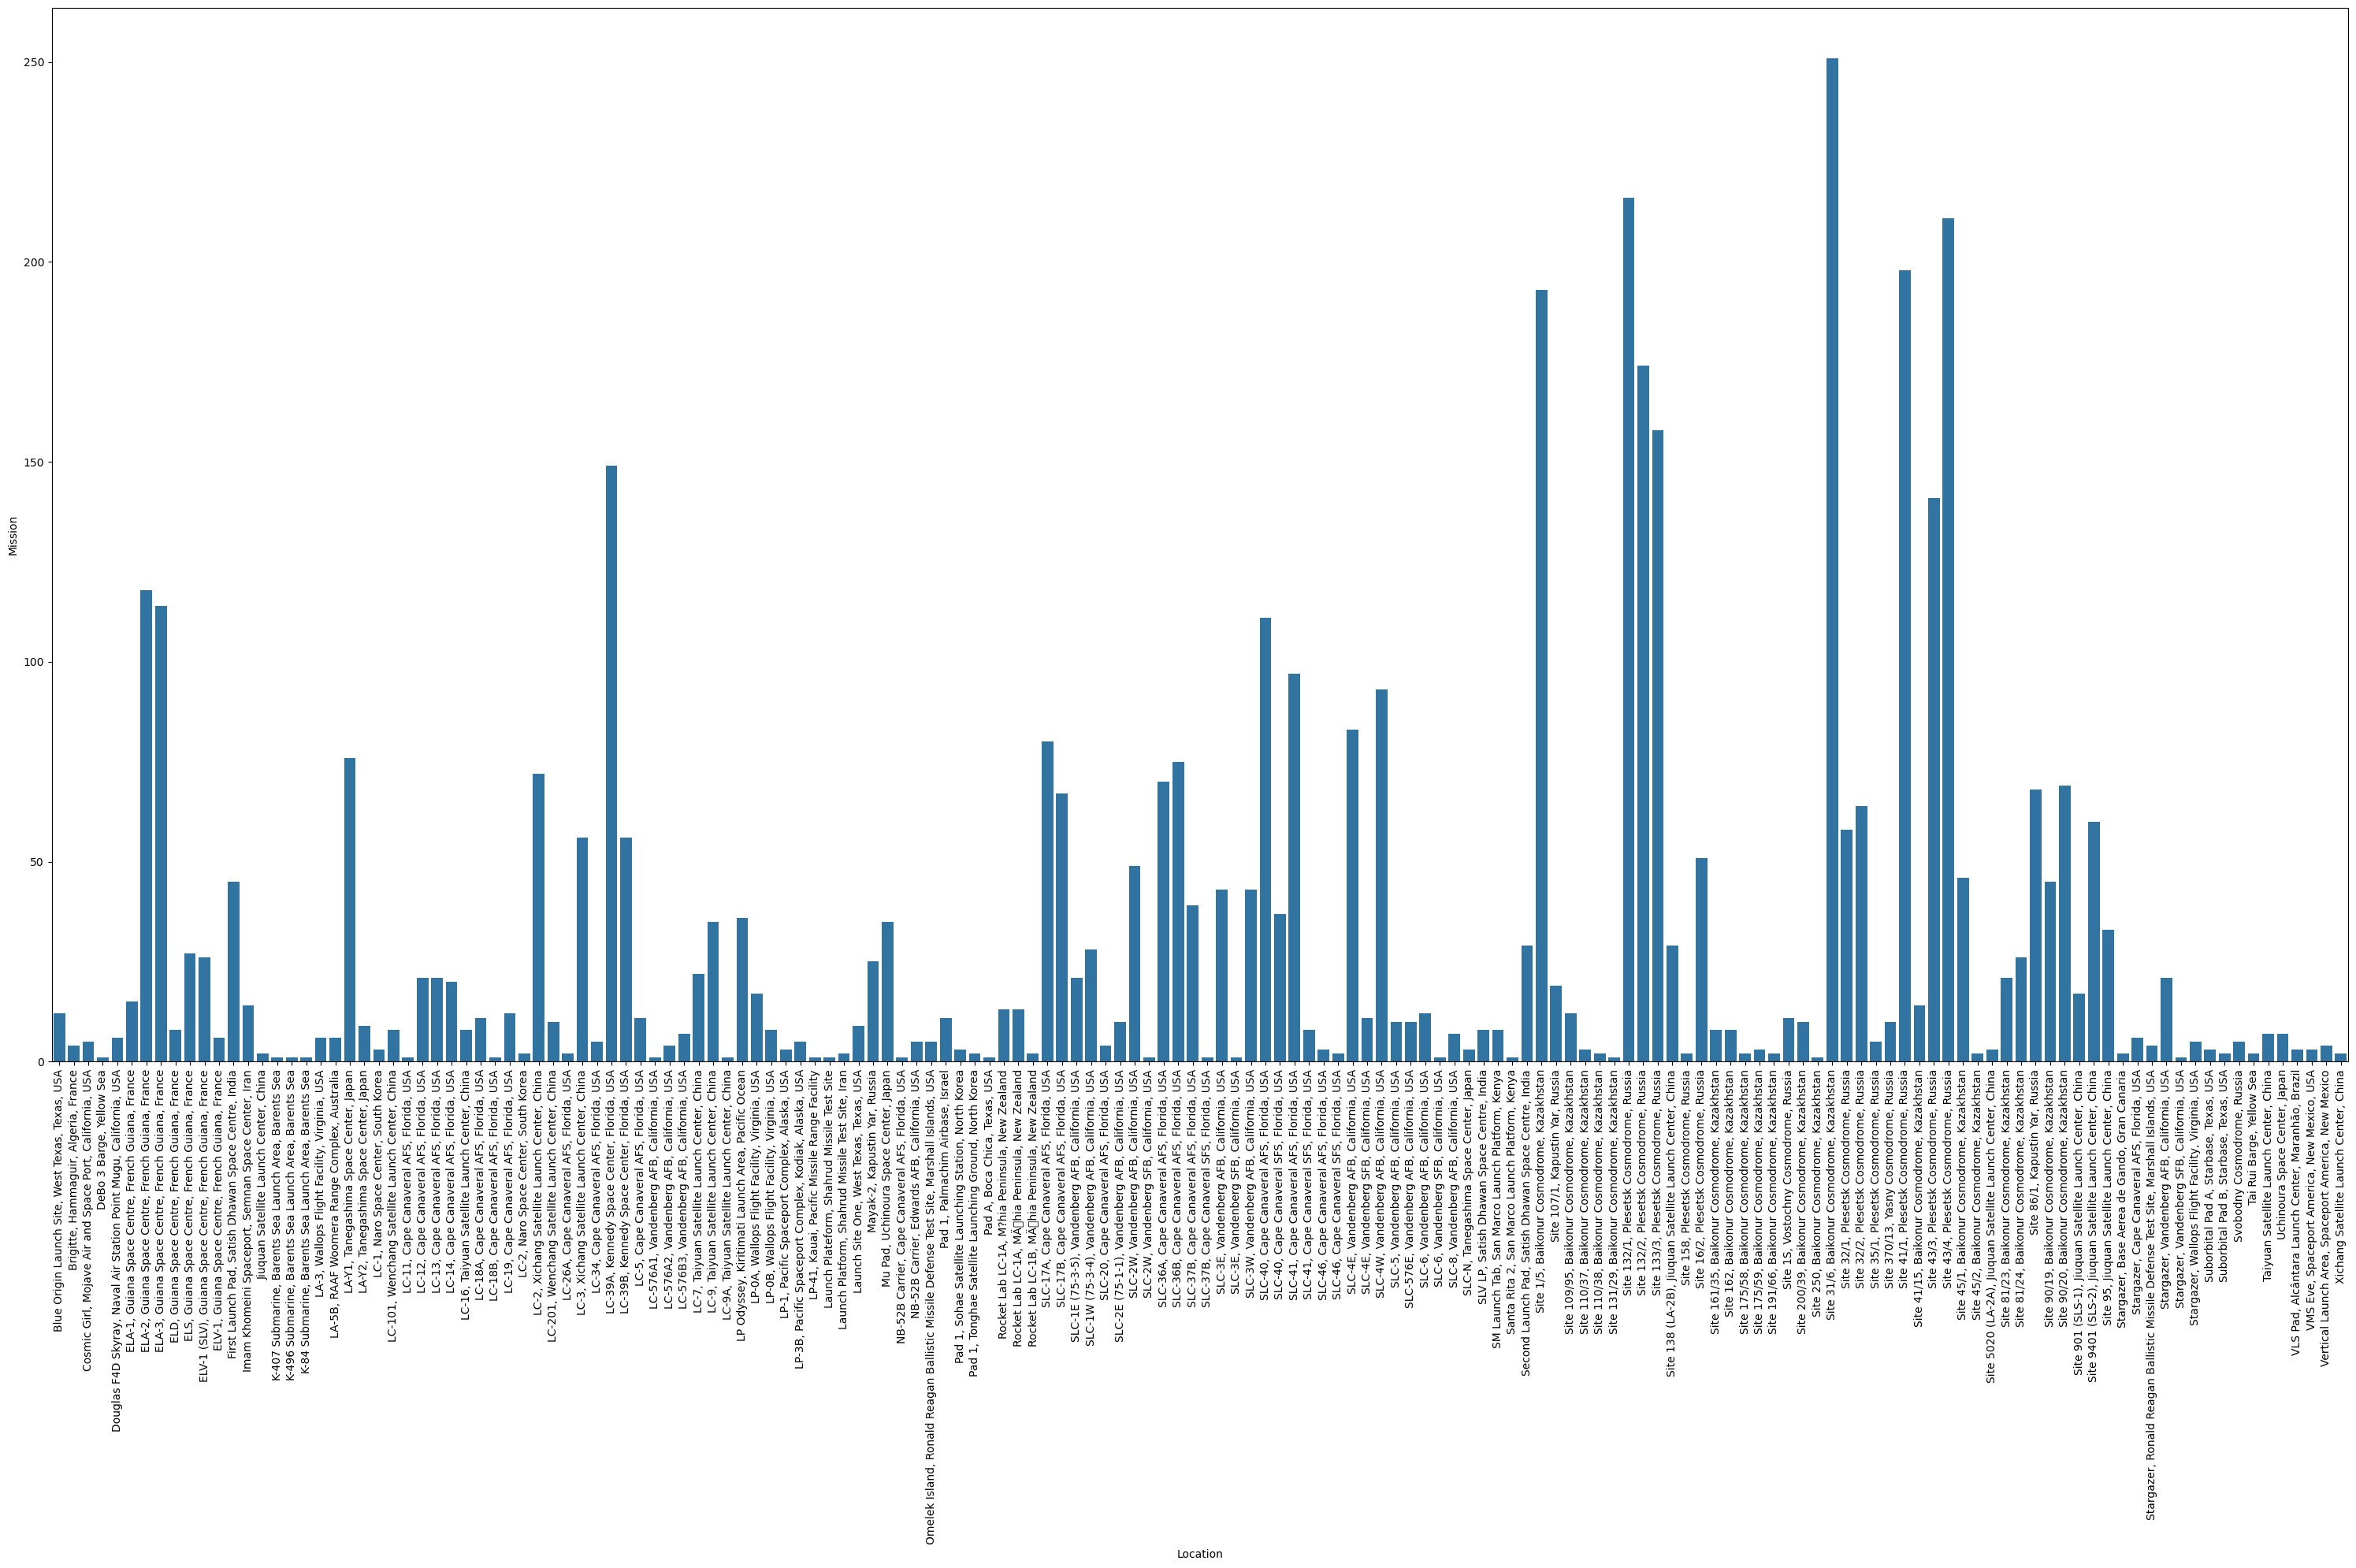

In [185]:
plt.figure(figsize=(30,20))
sns.barplot(x="Location",y="Mission",data=Location_wise_missions)
plt.xticks(rotation=90,fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Perform a time-series analysis of missions launched by decade.

In [191]:
decade_conditions = [
    (dataset["Date"].dt.year>=1950) & (dataset["Date"].dt.year<1960),
    (dataset["Date"].dt.year>=1960) & (dataset["Date"].dt.year<1970),
    (dataset["Date"].dt.year>=1970) & (dataset["Date"].dt.year<1980),
    (dataset["Date"].dt.year>=1980) & (dataset["Date"].dt.year<1990),
    (dataset["Date"].dt.year>=1990) & (dataset["Date"].dt.year<2000),
    (dataset["Date"].dt.year>=2000) & (dataset["Date"].dt.year<2010),
    (dataset["Date"].dt.year>=2010) & (dataset["Date"].dt.year<2020),
    (dataset["Date"].dt.year>=2020)
]

In [193]:
decade_output = [1950,1960,1970,1980,1990,2000,2010,2020]

In [195]:
dataset["Decade"] = np.select(decade_conditions,decade_output)

In [205]:
decade_wise_missions = dataset.groupby("Decade")[["Mission"]].count().reset_index()

In [223]:
max_count = decade_wise_missions["Mission"].max()
max_count

1012

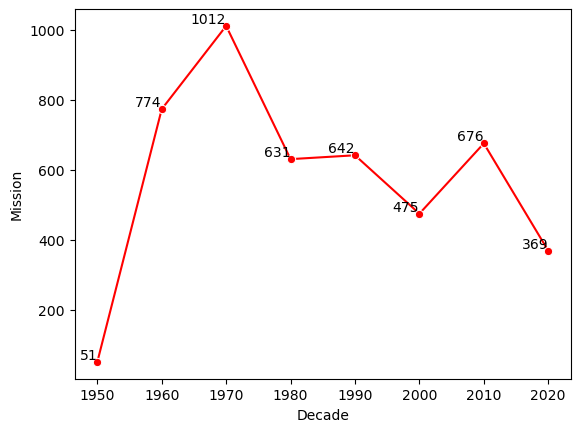

In [303]:
decades = []
missions = []

for d in decade_wise_missions["Decade"]:
    decades.append(d)
    
for m in decade_wise_missions["Mission"]:
    missions.append(m)
    
sns.lineplot(x="Decade",y="Mission",data=decade_wise_missions,marker ="o",color="r")

for x, y in zip(decades, missions):
    plt.text(x, y, str(y), fontsize=10, ha='right', va='bottom')

    # plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='black')

plt.show()

In [ ]:
# Create a scatter plot showing the relationship between mission cost and mission status.

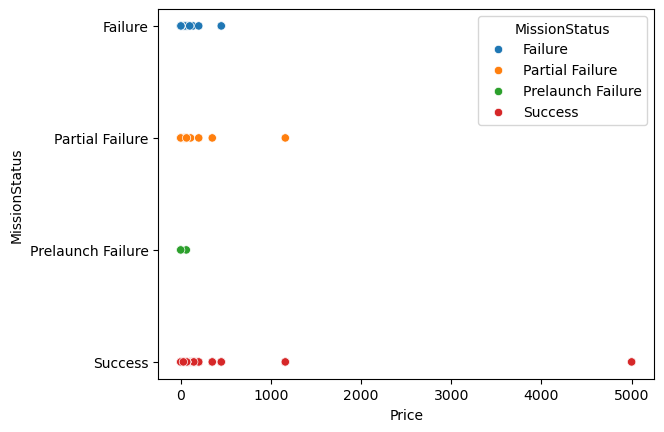

In [347]:
sns.scatterplot(x=dataset["Price"],y=dataset["MissionStatus"],data=dataset,hue="MissionStatus")
plt.show()

In [ ]:
# Find and plot the top 10 rockets used in space missions.

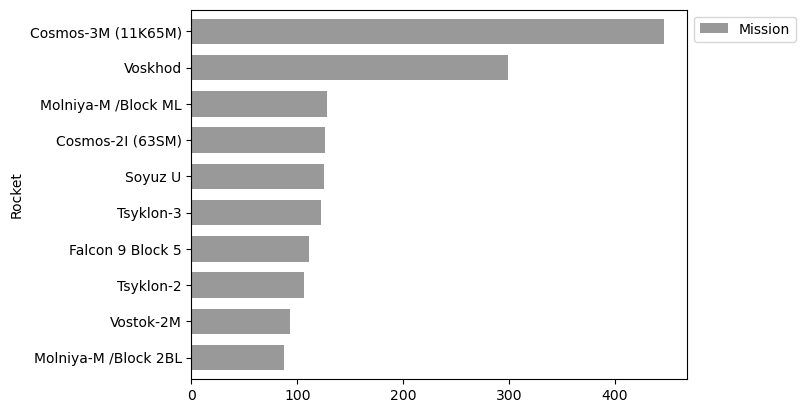

In [405]:
dataset.groupby("Rocket",observed=False)[["Mission"]].count().sort_values("Mission",ascending=False).iloc[0:10].sort_values("Mission").plot.barh(
    rot=360,width=0.7,color="black",alpha=0.4).legend(bbox_to_anchor=(1,1));

In [ ]:
# Analyze the trend of successful vs failed missions over the years using a stacked bar chart.

<Axes: xlabel='Date'>

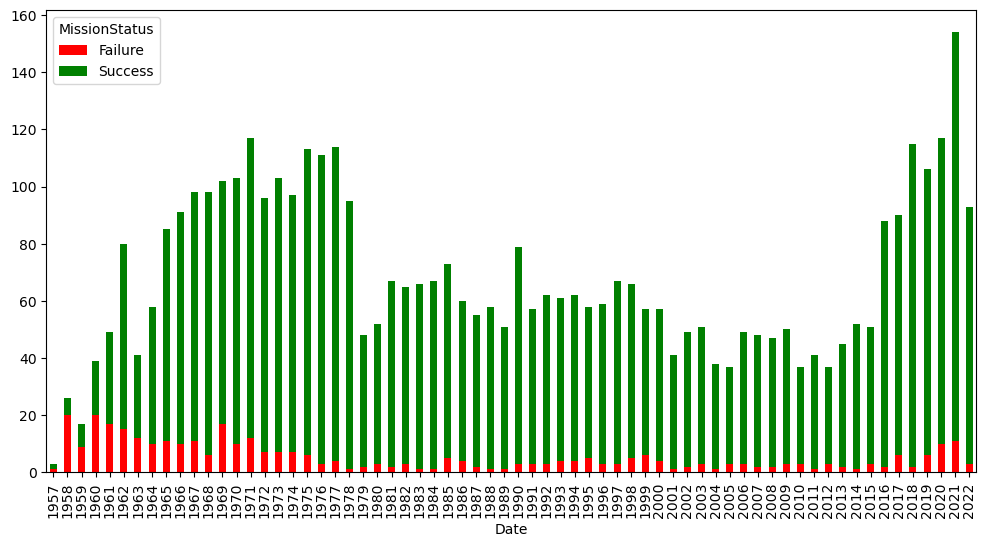

In [517]:
dataset.pivot_table(
    index=dataset["Date"].dt.year,
    columns="MissionStatus",
    values = "Mission",
    aggfunc= "count",
    observed = False
).loc[:,["Failure","Success"]].plot.bar(stacked=True,figsize=(12,6),color=["red","green"])

In [583]:
group =dataset.pivot_table(
    index=dataset["Date"].dt.year,
    columns = "MissionStatus",
    values = "Mission",
    aggfunc= "count",
    observed = False
).reset_index()

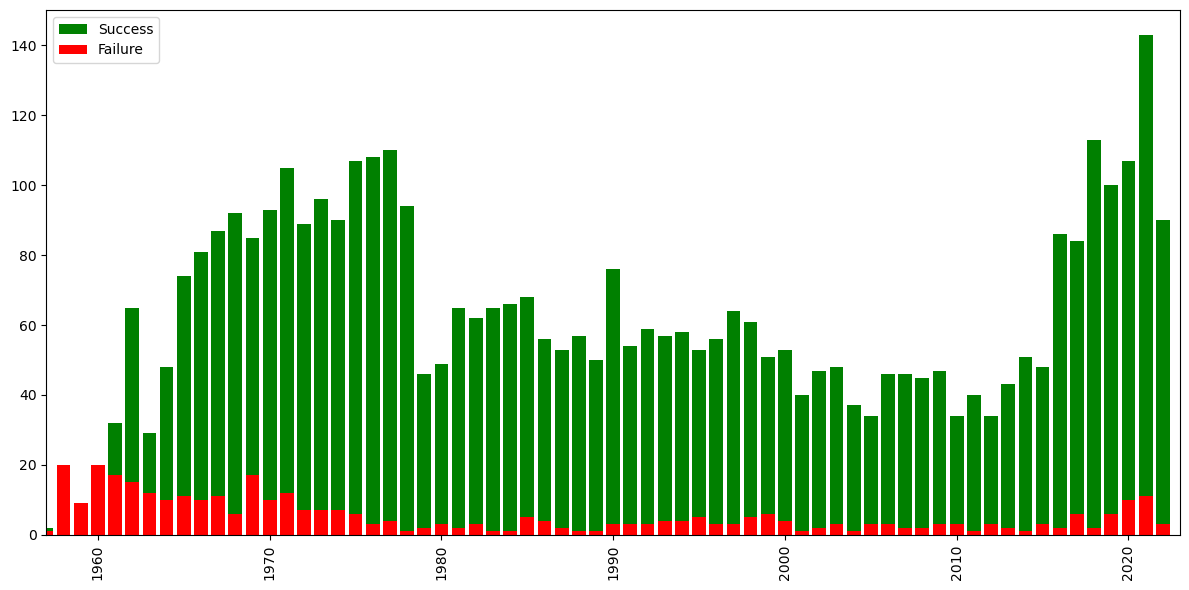

In [609]:
plt.figure(figsize=(12,6))
plt.bar(group["Date"],group["Success"],color="green",label="Success")
plt.bar(group["Date"],group["Failure"],color="red",label="Failure")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlim(1957,2023)
plt.show()

In [ ]:
# Create a heatmap showing the frequency of launches by location and year.

In [613]:
heat = dataset.pivot_table(
    index = "Location",
    columns = dataset["Date"].dt.year,
    values = "Mission",
    aggfunc= "count",
    observed = False
)

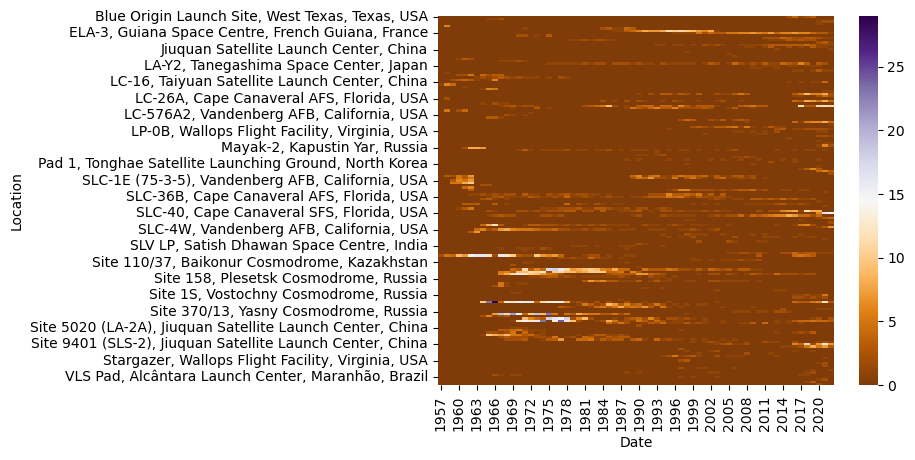

In [627]:
sns.heatmap(heat,cmap="PuOr")
plt.show()

In [ ]:
# Generate a pie chart representing the proportion of rockets with different statuses.

In [635]:
rocket_status = dataset.groupby("RocketStatus",observed=False)[["Rocket"]].count().reset_index()

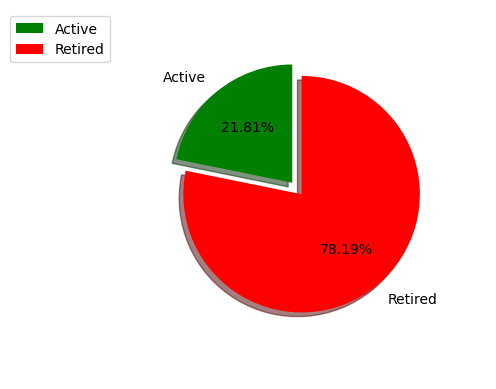

In [703]:
ex = [0.1,0.0]
c = ["green","red"]
plt.pie(x=rocket_status["Rocket"],labels=rocket_status["RocketStatus"],explode=ex,shadow=True,autopct="%0.2f%%",colors=c,radius=0.8,labeldistance=1.15,
       startangle=90)
plt.legend(bbox_to_anchor=(0,1))
plt.show()

In [ ]:
# Visualize the distribution of missions launched across different time periods (day, night).

In [779]:
dataset["Period"] = np.where(dataset["Time"].dt.hour>12,"Night","Day")

In [783]:
period_missions = dataset.groupby("Period",observed=False)[["Mission"]].count().reset_index()

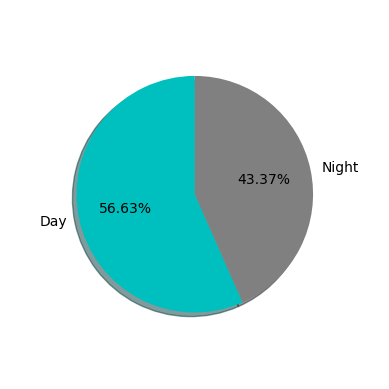

In [815]:
plt.pie(x=period_missions["Mission"],labels=period_missions["Period"],startangle=90,autopct="%0.2f%%",colors=["c","grey"],radius = 0.8,shadow=True)
plt.show()

In [ ]:
# Analyze the success rates for each company and create a comparative bar plot.

In [837]:
success = dataset.loc[mask,:].groupby("Company",observed=False)[["Mission"]].count().sort_values("Mission",ascending=False).reset_index()

In [863]:
all = dataset.groupby("Company",observed=False)[["Mission"]].count().reset_index()

In [871]:
success.drop("Ratio",axis=1,inplace=True)

In [877]:
success_vs_total = success.merge(
    all,
    how = "inner",
    left_on = "Company",
    right_on = "Company"
)

In [885]:
success_vs_total.rename(columns={"Mission_x":"Successful_Missions","Mission_y":"Total_Missions"},inplace=True)

In [889]:
success_vs_total["Success_Ratio"] = ((success_vs_total["Successful_Missions"]/success_vs_total["Total_Missions"])*100).round(2)

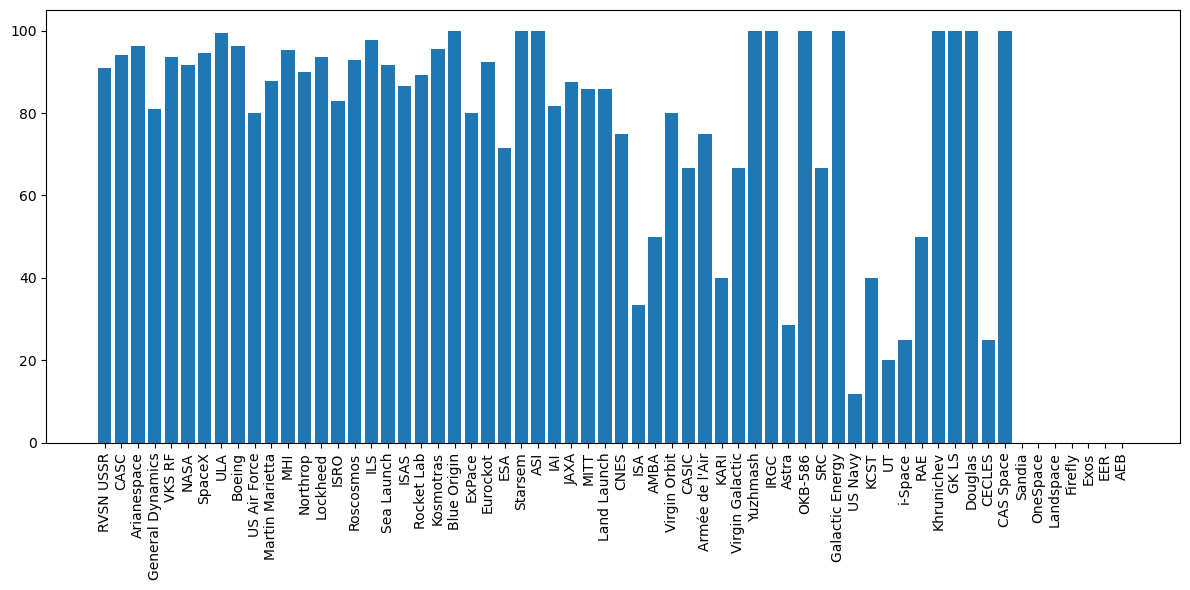

In [897]:
plt.figure(figsize=(12,6))
plt.bar(success_vs_total["Company"],success_vs_total["Success_Ratio"],data=success_vs_total)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Plot the cumulative number of missions launched by year.

In [23]:
year_wise_missions_cumulative = dataset.groupby(dataset["Date"].dt.year)[["Mission"]].count().reset_index().rename(columns={"Date":"Year","Mission":"Total_Mission"})

In [89]:
year_wise_missions_cumulative["Cumulative_Total"]=year_wise_missions_cumulative["Total_Mission"].rolling(2).sum().fillna(3).astype("int")

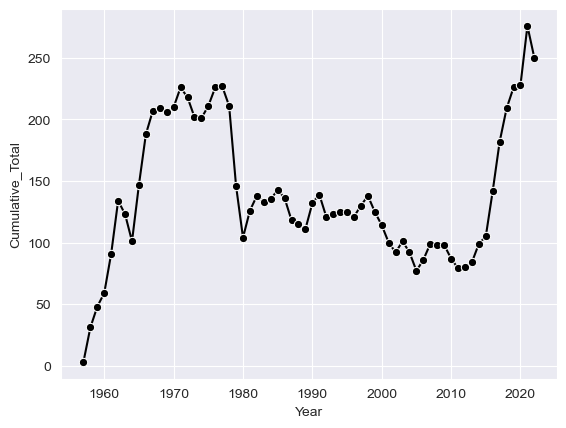

In [125]:
years=[]
for name in year_wise_missions_cumulative["Year"]:
    years.append(name)
total=[]
for num in year_wise_missions_cumulative["Cumulative_Total"]:
    total.append(num)

sns.lineplot(x="Year",y="Cumulative_Total",data=year_wise_missions_cumulative,color="k",marker="o")
# for x,y in zip(years,total):
    # plt.text(x,y,str(y),fontsize=10,ha="right",va="bottom")
    # plt.annotate(str(y),(x,y),textcoords="offset points",xytext=(0,10))
plt.show()

In [ ]:
# Analyze and visualize the total cost of missions launched by each company.

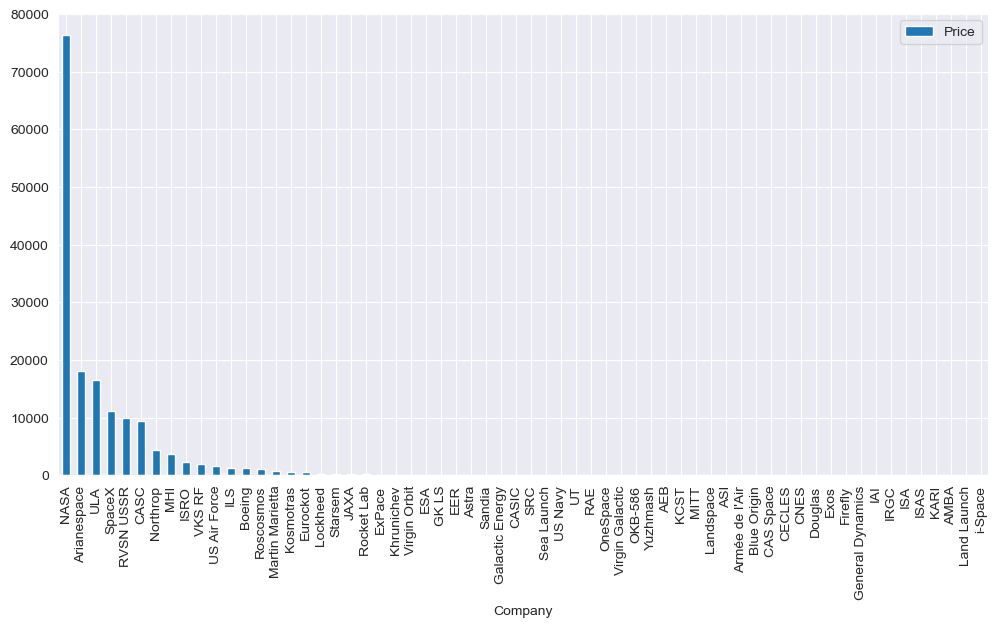

In [151]:
dataset.groupby("Company",observed=False)[["Price"]].sum().sort_values("Price",ascending=False).plot.bar(
    figsize=(12,6)
);

In [171]:
company_cost = dataset.groupby("Company",observed=False)[["Price"]].sum().sort_values("Price",ascending=False).reset_index().rename(columns={"Price":"Total_Cost"})

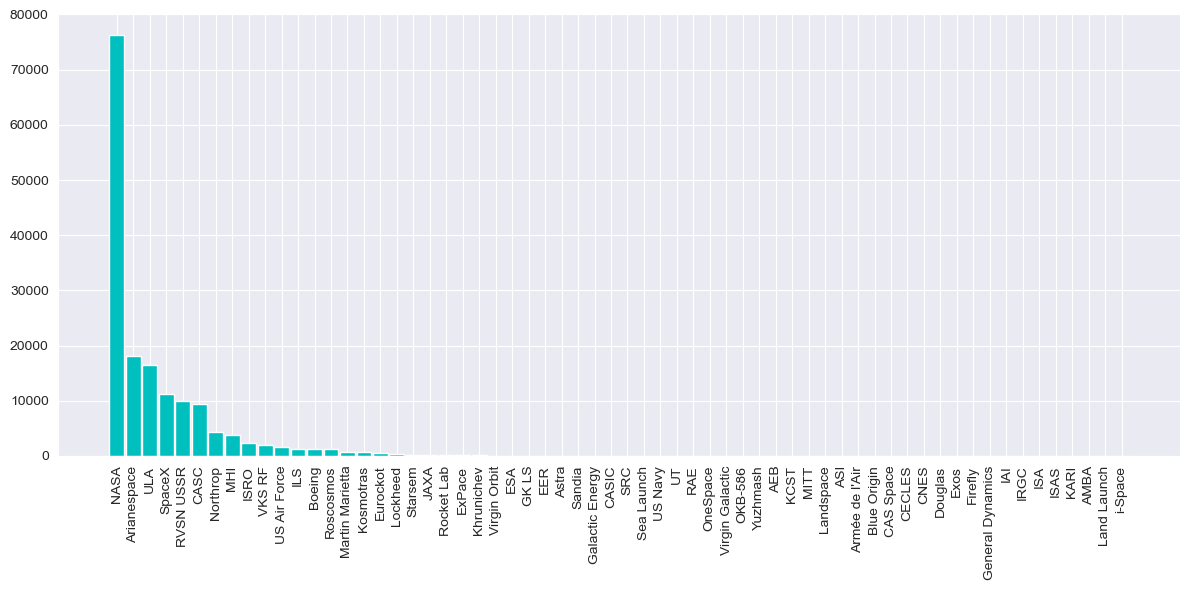

In [215]:
c=[]
for com in company_cost["Company"]:
    c.append(com)
p=[]
for price in company_cost["Total_Cost"]:
    p.append(price)

plt.figure(figsize=(12,6))
plt.bar(company_cost["Company"],company_cost["Total_Cost"],color="c",edgecolor="w",width=0.9)
# for x,y in zip (c,p):
#     plt.text(x,y,str(y),ha="left",va="bottom")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [ ]:
# Create a word cloud of mission names to find common themes.

In [3]:
!pip install wordcloud

In [5]:
from wordcloud import WordCloud, STOPWORDS

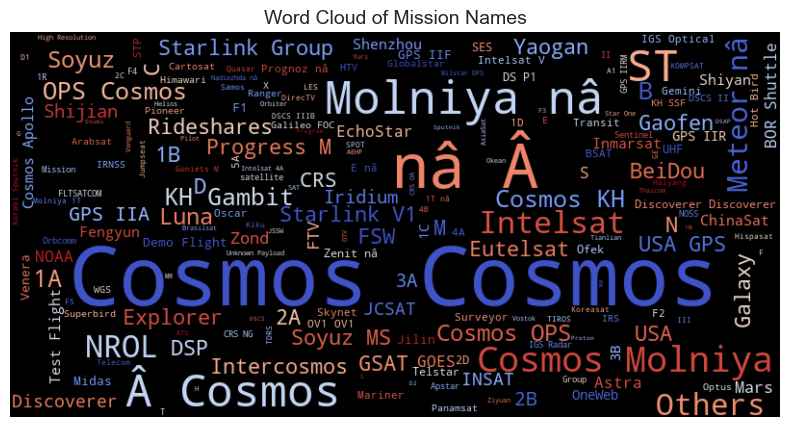

In [35]:
text = " ".join(dataset["Mission"].dropna())  

# Define stopwords (common words to exclude)
stopwords = set(STOPWORDS)

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="black",
                      stopwords=stopwords, colormap='coolwarm').generate(text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud of Mission Names", fontsize=14)
plt.show()

In [ ]:
# Generate a violin plot to explore the variation in mission costs for successful vs failed missions.

In [73]:
vio = dataset.groupby("MissionStatus",observed=False)[["Price"]].sum().reset_index().

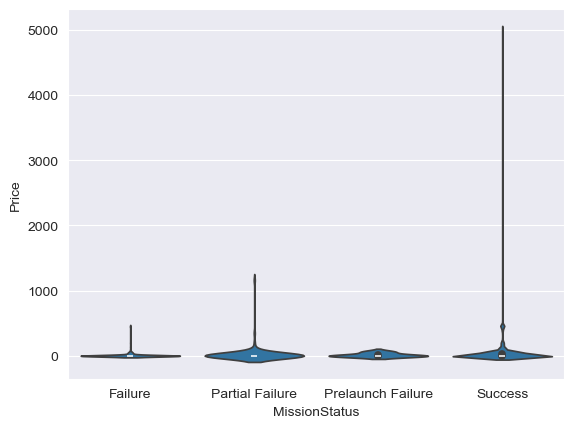

In [107]:
sns.violinplot(x="MissionStatus",y="Price",data=dataset,density_norm="width");

In [ ]:
# Calculate the average cost of missions for each year and plot it as a trend line.

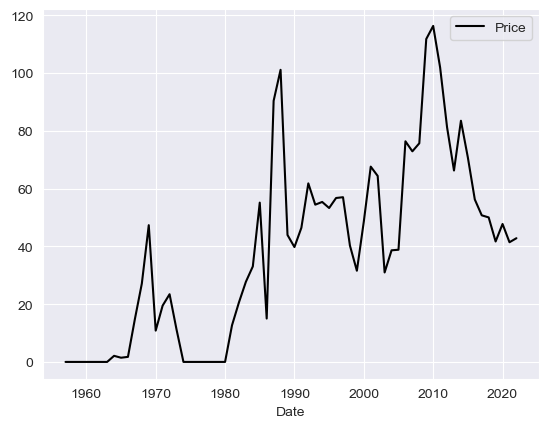

In [115]:
dataset.groupby(dataset["Date"].dt.year)[["Price"]].mean().plot(color="k");

In [ ]:
# Compare the number of missions launched from the top 5 most frequent locations using a bar plot.

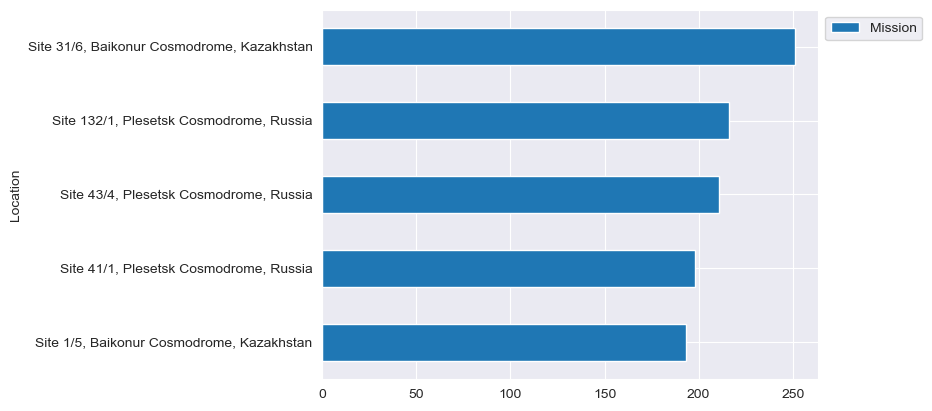

In [133]:
dataset.groupby("Location",observed=False)[["Mission"]].count().sort_values("Mission",ascending=False).iloc[0:5].sort_values("Mission").plot.barh().legend(
    bbox_to_anchor=(1,1));

In [139]:
top_5_location = dataset.groupby("Location",observed=False)[["Mission"]].count().sort_values("Mission",ascending=False).iloc[0:5].sort_values("Mission").reset_index()

[]

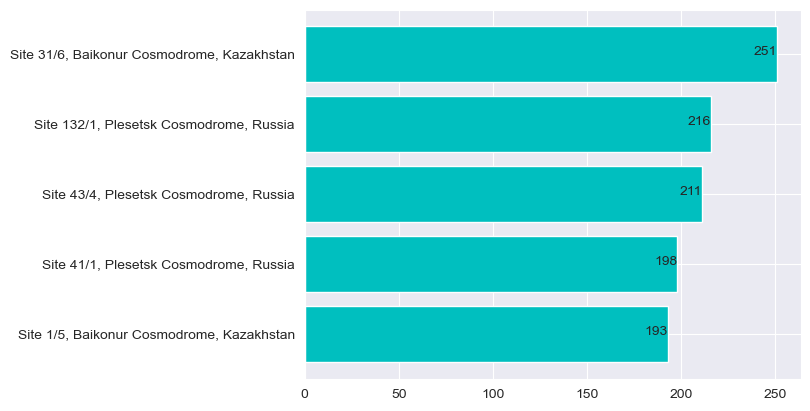

In [175]:
l=[]
for loc in top_5_location["Location"]:
    l.append(loc)
m=[]
for mis in top_5_location["Mission"]:
    m.append(mis)

plt.barh(top_5_location["Location"],top_5_location["Mission"],color="c")
for x,y in zip (l,m):
    plt.text(y,x,str(y),ha="right")
plt.plot()

In [ ]:
# Use a box plot to analyze mission costs by rocket status (retired/active).

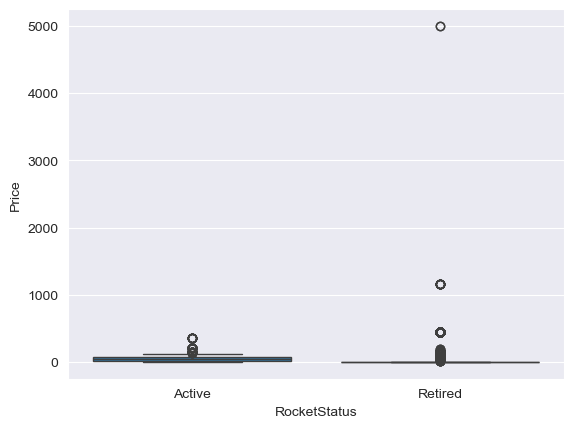

In [177]:
sns.boxplot(x="RocketStatus",y="Price",data=dataset);